In [59]:
#Import packages
import csv
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Generate a list of colors based on the "bright" color scheme
colors = sns.color_palette('bright', n_colors=12)

In [60]:
df = pd.read_csv('/Users/patrickmoll/Desktop/cis590data/DateTimeCleanedData/DateTimeCleanedReservationsAll.csv')
df.head()

,Facility Class,Facility Location,Facility Code,Facility,Status,Reservation Type,Headcount,BeginTimeDate,EndTimeDate,Duration Minutes,Weekday,Month,Year,BeginTime
0,BDEF,CARN,CAREF,Entire Facility,Firm,Facility,100.000000,2013-01-06 09:00:00,2013-01-06 12:30:00,210.0,6,1,2013,9.0
1,BDMUL,CARN,HRTG,Heritage Room l,Firm,Facility,100.000000,2013-01-06 17:00:00,2013-01-06 23:00:00,360.0,6,1,2013,17.0
2,BDMUL,CARN,HRTG,Heritage Room l,Firm,Activity,36.387374,2013-01-07 17:30:00,2013-01-07 18:25:00,55.0,0,1,2013,17.5
3,BDMUL,CARN,HRTG,Heritage Room l,Firm,Activity,36.387374,2013-01-09 17:30:00,2013-01-09 18:25:00,55.0,2,1,2013,17.5
4,BDMUL,CARN,HRTG,Heritage Room l,Firm,Activity,36.387374,2013-01-09 19:00:00,2013-01-09 20:15:00,75.0,2,1,2013,19.0


In [61]:
#load in precipitation weather from weather.gov
df2 = pd.read_csv("/Users/patrickmoll/Desktop/cis590data/Precipitation.csv", header=None)
df2.columns = [1,2,3,4,5,6,7,8,9,10,11,12]
df2.head(15)

,1,2,3,4,5,6,7,8,9,10,11,12
0,0.03,0.06,0.05,0.12,0.20,0.05,0.04,0.10,0.12,0.13,0.03,0.01
1,0.00,0.04,0.03,0.12,0.07,0.31,0.06,0.19,0.15,0.18,0.01,0.06
2,0.03,0.02,0.02,0.09,0.29,0.14,0.27,0.10,0.11,0.03,0.17,0.10
3,0.02,0.02,0.05,0.15,0.24,0.04,0.16,0.10,0.20,0.06,0.01,0.03
4,0.03,0.00,0.08,0.23,0.09,0.20,0.10,0.16,0.12,0.11,0.00,0.01
5,0.02,0.04,0.05,0.03,0.09,0.08,0.08,0.15,0.06,0.22,0.04,0.10
6,0.05,0.05,0.10,0.16,0.31,0.24,0.07,0.38,0.10,0.04,0.04,0.05
7,0.06,0.03,0.11,0.12,0.14,0.19,0.21,0.04,0.07,0.03,0.04,0.03
8,0.07,0.00,0.11,0.15,0.28,0.17,0.07,0.28,0.15,0.20,0.03,0.01
9,0.01,0.00,0.13,0.06,0.26,0.09,0.07,0.10,0.01,0.04,0.12,0.03


In [62]:
b = lambda row: df2[row['Month']][row['Year'] - 2013] 
new_col = df.apply(b, axis=1)
df['Precipitation'] = new_col

AttributeError: 'DataFrame' object has no attribute 'types'

In [64]:
#load in avg temp data from weather.gov
df2 = pd.read_csv("/Users/patrickmoll/Desktop/cis590data/AvgTempInC.csv", header=None)
df2.columns = [1,2,3,4,5,6,7,8,9,10,11,12]
df2.head(15)

,1,2,3,4,5,6,7,8,9,10,11,12
0,32.6,32.9,38.4,49.6,63.4,74.7,77.8,77.0,71.8,55.5,41.2,28.6
1,26.3,26.0,40.8,53.3,66.9,75.4,74.9,80.2,66.0,56.6,36.7,34.6
2,29.8,25.9,45.6,56.5,64.0,76.1,78.2,74.3,72.4,57.0,47.0,38.6
3,29.3,38.3,49.3,57.0,62.1,78.5,78.9,77.1,71.2,61.2,49.5,27.9
4,32.1,42.8,48.2,57.0,64.3,74.2,79.5,72.0,70.9,57.4,45.0,32.4
5,28.2,32.3,44.6,47.6,73.9,79.6,79.3,78.2,70.4,55.7,35.9,34.5
6,29.1,29.1,40.6,57.2,63.4,74.5,79.5,77.8,75.9,51.4,40.2,36.2
7,32.1,34.3,48.8,52.8,62.3,78.2,79.4,75.0,66.6,52.5,47.8,35.3
8,33.9,22.6,49.0,54.3,62.8,77.1,78.3,79.2,72.6,59.5,45.9,42.3
9,29.3,31.1,44.5,53.8,66.5,76.7,79.8,77.5,70.2,55.7,41.4,32.1


In [65]:
new_col = df.apply(b, axis=1)
df['Temperature'] = new_col

In [66]:
df.head()

,Facility Class,Facility Location,Facility Code,Facility,Status,Reservation Type,Headcount,BeginTimeDate,EndTimeDate,Duration Minutes,Weekday,Month,Year,BeginTime,Precipitation,Temperature
0,BDEF,CARN,CAREF,Entire Facility,Firm,Facility,100.000000,2013-01-06 09:00:00,2013-01-06 12:30:00,210.0,6,1,2013,9.0,0.03,32.6
1,BDMUL,CARN,HRTG,Heritage Room l,Firm,Facility,100.000000,2013-01-06 17:00:00,2013-01-06 23:00:00,360.0,6,1,2013,17.0,0.03,32.6
2,BDMUL,CARN,HRTG,Heritage Room l,Firm,Activity,36.387374,2013-01-07 17:30:00,2013-01-07 18:25:00,55.0,0,1,2013,17.5,0.03,32.6
3,BDMUL,CARN,HRTG,Heritage Room l,Firm,Activity,36.387374,2013-01-09 17:30:00,2013-01-09 18:25:00,55.0,2,1,2013,17.5,0.03,32.6
4,BDMUL,CARN,HRTG,Heritage Room l,Firm,Activity,36.387374,2013-01-09 19:00:00,2013-01-09 20:15:00,75.0,2,1,2013,19.0,0.03,32.6


In [130]:
cols = ['Facility Class', 'Facility Location', 'Facility Code', 'Facility', 'Status', 'Reservation Type']
df[cols] = df[cols].apply(lambda x: pd.factorize(x)[0])
print(df['Headcount'].corr(df['Precipitation']))
print(df['Month'].corr(df['Temperature']))
print(df['Facility'].corr(df['Precipitation']))
print(df['Status'].corr(df['Temperature']))

-0.02098950879925129
0.2610401491250834
-0.06279859500032606
0.045632879896747774


In [ ]:
#outliers with temperatures
#same months with different years

In [128]:
outdoors = ['Front Lawn', 'Garden', 'Racquet Ball Court', 'Turf Half Field #1','Turf Half Field #2', 'Turf Small Field #1', 'Turf Small Field #2', 'Turf Small Field #3', 'Turf Full Field', 'Turf Birthday Party', 
            'Court 1A', 'Court 1B', 'Court 2A', 'Court 2B', 'Court 3A', 'Court 3B', 'Court 4A', 'Court 4B', 'Court 5A', 'Court 5B', 'Court 6A', 'Court 6B', 'Court 7A', 'Court 7B', 'Court 8A', 'Court 8B']
df['isOutside'] = df['Facility'].apply(lambda x: "Yes" if any(outdoor in x for outdoor in outdoors) else "No")
df.head(20)

,Facility Class,Facility Location,Facility Code,Facility,Status,Reservation Type,Headcount,BeginTimeDate,EndTimeDate,Duration Minutes,Weekday,Month,Year,BeginTime,Precipitation,Temperature,isOutside,isOutsideFac
0,BDEF,CARN,CAREF,Entire Facility,Firm,Facility,100.000000,2013-01-06 09:00:00,2013-01-06 12:30:00,210.0,6,1,2013,9.0,0.03,32.6,Yes,0
1,BDMUL,CARN,HRTG,Heritage Room l,Firm,Facility,100.000000,2013-01-06 17:00:00,2013-01-06 23:00:00,360.0,6,1,2013,17.0,0.03,32.6,Yes,0
2,BDMUL,CARN,HRTG,Heritage Room l,Firm,Activity,36.387374,2013-01-07 17:30:00,2013-01-07 18:25:00,55.0,0,1,2013,17.5,0.03,32.6,Yes,0
3,BDMUL,CARN,HRTG,Heritage Room l,Firm,Activity,36.387374,2013-01-09 17:30:00,2013-01-09 18:25:00,55.0,2,1,2013,17.5,0.03,32.6,Yes,0
4,BDMUL,CARN,HRTG,Heritage Room l,Firm,Activity,36.387374,2013-01-09 19:00:00,2013-01-09 20:15:00,75.0,2,1,2013,19.0,0.03,32.6,Yes,0
5,BDMUL,CARN,HRTG,Heritage Room l,Firm,Activity,36.387374,2013-01-10 18:00:00,2013-01-10 19:15:00,75.0,3,1,2013,18.0,0.03,32.6,Yes,0
6,BDEF,CARN,CAREF,Entire Facility,Firm,Facility,100.000000,2013-01-13 09:00:00,2013-01-13 12:30:00,210.0,6,1,2013,9.0,0.03,32.6,Yes,0
7,BDMUL,CARN,HRTG,Heritage Room l,Firm,Activity,36.387374,2013-01-14 17:30:00,2013-01-14 18:25:00,55.0,0,1,2013,17.5,0.03,32.6,Yes,0
8,BDMUL,CARN,HRTG,Heritage Room l,Firm,Activity,36.387374,2013-01-14 18:30:00,2013-01-14 20:00:00,90.0,0,1,2013,18.5,0.03,32.6,Yes,0
9,BDMUL,CARN,HRTG,Heritage Room l,Firm,Activity,36.387374,2013-01-16 17:30:00,2013-01-16 18:25:00,55.0,2,1,2013,17.5,0.03,32.6,Yes,0


In [121]:
df['isOutsideFac'] = pd.factorize(df['isOutside'])[0]
df['isOutsideFac'].corr(df['Temperature'])
df['isOutsideFac'].corr(df['Temperature'])

-0.14038084045601712

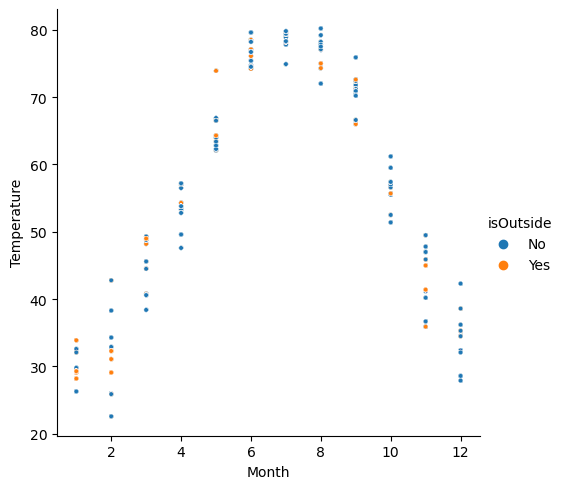

In [123]:
sns.relplot(data=df, x="Month", y="Temperature", hue="isOutside", s=10)

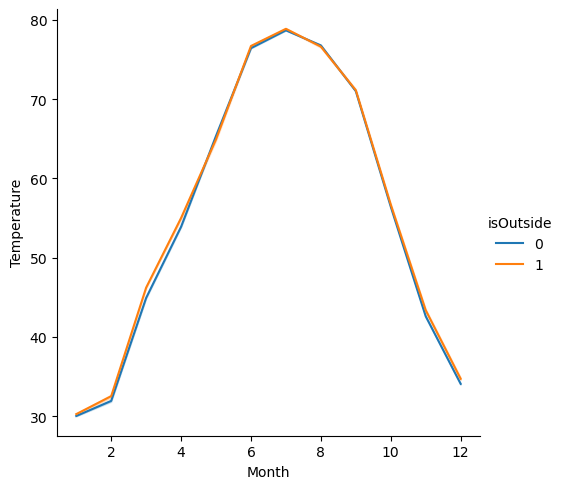

In [109]:
sns.relplot(
    data=df, kind="line",
    x="Month", y="Temperature", hue="isOutside",
)

,Facility Class,Facility Location,Facility Code,Facility,Status,Reservation Type,Headcount,BeginTimeDate,EndTimeDate,Duration Minutes,Weekday,Month,Year,BeginTime,Precipitation,Temperature,isOutside
17423,BDGYM,SPL,CRT2A,Court 2A,Firm,Facility,15.000000,2014-10-04 11:00:00,2014-10-04 12:00:00,60.0,5,10,2014,11.0,0.18,56.6,0
17427,BDGYM,SPL,CRT2A,Court 2A,Firm,Facility,15.000000,2014-10-05 13:00:00,2014-10-05 14:00:00,60.0,6,10,2014,13.0,0.18,56.6,0
17663,BDGYM,SPL,CRT2A,Court 2A,Firm,Facility,20.000000,2014-10-25 09:30:00,2014-10-25 11:00:00,90.0,5,10,2014,9.5,0.18,56.6,0
17760,BDGYM,SPL,CRT2A,Court 2A,Firm,Facility,20.000000,2014-11-01 09:30:00,2014-11-01 11:00:00,90.0,5,11,2014,9.5,0.01,36.7,0
18000,BDGYM,SPL,CRT2A,Court 2A,Firm,Facility,15.000000,2014-11-14 15:00:00,2014-11-14 16:30:00,90.0,4,11,2014,15.0,0.01,36.7,0
18608,BDGYM,SPL,CRT2A,Court 2A,Firm,Facility,4.000000,2014-12-26 10:00:00,2014-12-26 11:00:00,60.0,4,12,2014,10.0,0.06,34.6,0
18612,BDGYM,SPL,CRT2A,Court 2A,Firm,Facility,100.000000,2014-12-27 08:00:00,2014-12-27 16:00:00,480.0,5,12,2014,8.0,0.06,34.6,0
27007,BDGYM,SPL,CRT2A,Court 2A,Firm,Facility,100.000000,2015-01-03 08:00:00,2015-01-03 20:00:00,720.0,5,1,2015,8.0,0.03,29.8,0
27139,BDGYM,SPL,CRT2A,Court 2A,Firm,Facility,100.000000,2015-01-10 08:00:00,2015-01-10 20:00:00,720.0,5,1,2015,8.0,0.03,29.8,0
27162,BDGYM,SPL,CRT2A,Court 2A,Firm,Facility,100.000000,2015-01-11 08:00:00,2015-01-11 18:00:00,600.0,6,1,2015,8.0,0.03,29.8,0


In [111]:
df['isOutside'].corr(df['Temperature'])

-0.14038084045601712

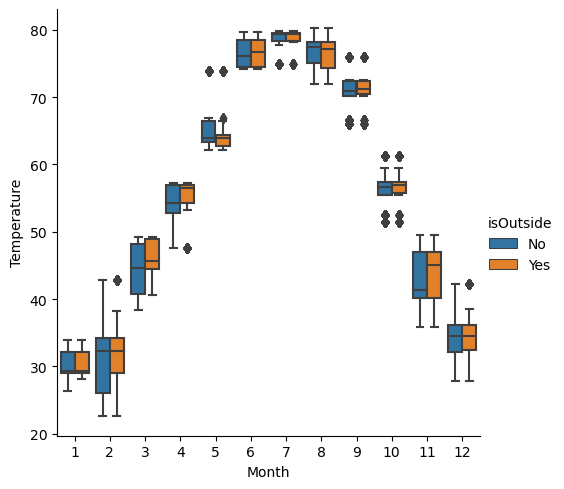

In [126]:
sns.catplot(data=df, x="Month", y="Temperature", hue='isOutside' ,kind="box")

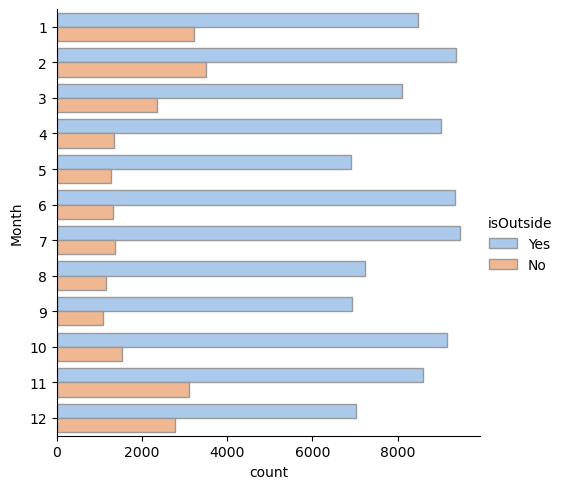

In [129]:
sns.catplot(
    data=df, y="Month", hue="isOutside", kind="count",
    palette="pastel", edgecolor=".6",
)

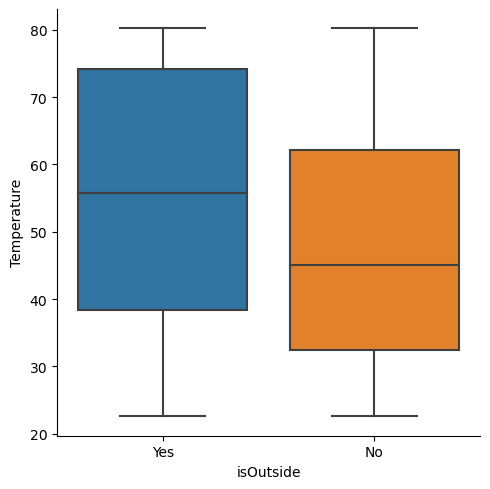

In [134]:
sns.catplot(data=df, x="isOutside", y="Temperature", kind="box")